<a href="https://colab.research.google.com/github/emiliomercuri/hidrologia/blob/main/notebooks/2023-05-29_Importando_base_CHIRPS_UVAIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Faz a leitura de arquivos de precipitação (mm) da base CHIRPS

In [3]:
import pandas as pd
import numpy
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

In [8]:
# Baixa dados da base CHIRPS
!gdown 19i_rObMrmaqpbAQiBF1-Q68AxXGfOMWB

Downloading...
From: https://drive.google.com/uc?id=19i_rObMrmaqpbAQiBF1-Q68AxXGfOMWB
To: /content/Precipitacao_CHIRPS_UVAIA_1981-2023.csv
100% 269k/269k [00:00<00:00, 70.7MB/s]


In [9]:
# dados da base CHIRPS
UVAIA_CHIRPS = pd.read_csv('Precipitacao_CHIRPS_UVAIA_1981-2023.csv',
                          sep=';', index_col=[0])
UVAIA_CHIRPS.index=pd.to_datetime(UVAIA_CHIRPS.index)
UVAIA_CHIRPS

,(mm) Precipitation (CHIRPS) at uvaia. 1981-01-01 to 2023-04-30
1981-01-01,0.0000
1981-01-02,0.0000
1981-01-03,0.0000
1981-01-04,4.8347
1981-01-05,10.3618
...,...
2023-04-26,2.8547
2023-04-27,0.0000
2023-04-28,0.0000
2023-04-29,0.0000


In [10]:
# Dados de pluviômetros
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')
UVAIA_pluviom = pd.read_csv('https://raw.githubusercontent.com/emiliomercuri/hidrologia/main/precipitation_CHIRPS/64444000_prec_UVAIA.csv',
                          sep=',', index_col=[0], parse_dates=['data'], date_parser=dateparse)
UVAIA_pluviom.index=pd.to_datetime(UVAIA_pluviom.index)
UVAIA_pluviom


,prcp(mm/dia)
data,
1979-01-01,8.3
1979-01-02,7.9
1979-01-03,30.7
1979-01-04,11.4
1979-01-05,0.0
...,...
2017-06-26,0.0
2017-06-27,0.0
2017-06-28,0.0


In [11]:
# Cria DataFrame contendo as duas colunas
df = pd.DataFrame()

df['prec_CHIRPS(mm)'] = UVAIA_CHIRPS['1981-01-01':'2017-06-30']
df['prec_PLUVIO(mm)'] = UVAIA_pluviom['1981-01-01':'2017-06-30']
df

,prec_CHIRPS(mm),prec_PLUVIO(mm)
1981-01-01,0.0000,0.2
1981-01-02,0.0000,0.4
1981-01-03,0.0000,0.0
1981-01-04,4.8347,5.2
1981-01-05,10.3618,8.2
...,...,...
2017-06-26,0.0000,0.0
2017-06-27,0.0000,0.0
2017-06-28,0.0000,0.0
2017-06-29,0.0000,0.0


In [12]:
df.isna().sum()

prec_CHIRPS(mm)    0
prec_PLUVIO(mm)    0
dtype: int64

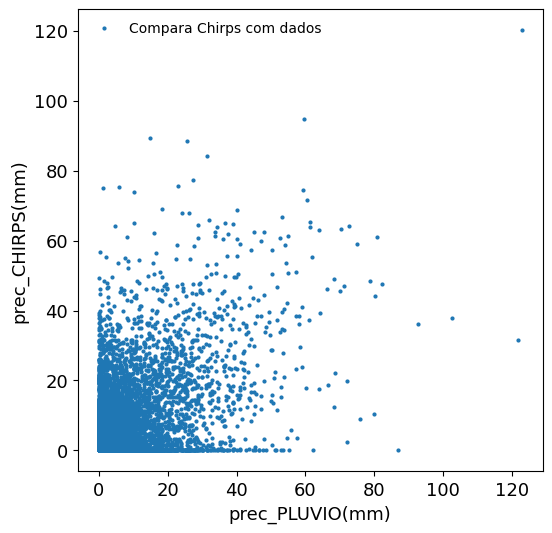

In [30]:
plt.figure(figsize=(6,6))
#z = numpy.array([0, 60000])
plt.plot(df['prec_PLUVIO(mm)'],df['prec_CHIRPS(mm)'], 'o-',linewidth = 0,markersize = 2, markeredgewidth = 1,label='Compara Chirps com dados')
#plt.plot(z,z,color='black')

plt.xlabel('prec_PLUVIO(mm)', fontsize=13) #y label
plt.ylabel('prec_CHIRPS(mm)', fontsize=13) #y label
plt.tick_params(axis='both', labelsize=13) #increase font size for ticks
plt.legend(frameon=False,fontsize=10)
#plt.savefig('pluvio.png', dpi = 300)
plt.show();

In [22]:
# Acumula os dados
acumulado = df.cumsum() #calculando o acumulado dos dados de cada coluna do dataframe
acumulado

,prec_CHIRPS(mm),prec_PLUVIO(mm)
1981-01-01,0.0000,0.2
1981-01-02,0.0000,0.6
1981-01-03,0.0000,0.6
1981-01-04,4.8347,5.8
1981-01-05,15.1965,14.0
...,...,...
2017-06-26,58202.4166,57222.7
2017-06-27,58202.4166,57222.7
2017-06-28,58202.4166,57222.7
2017-06-29,58202.4166,57222.7


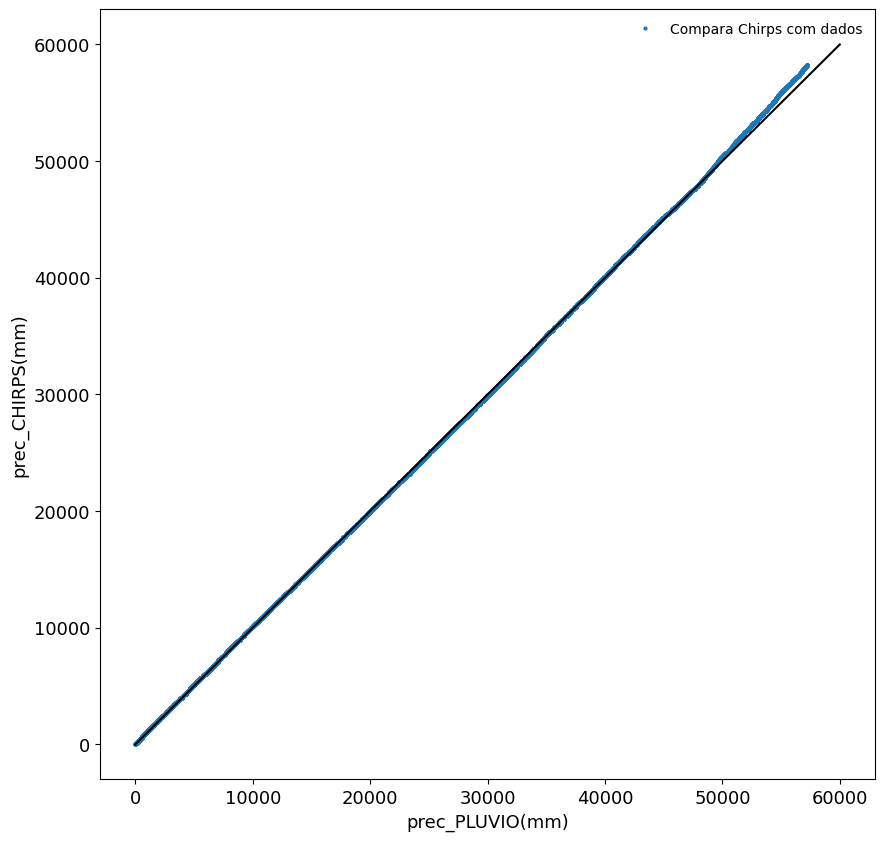

In [28]:
plt.figure(figsize=(10,10))
z = numpy.array([0, 60000])
plt.plot(acumulado['prec_PLUVIO(mm)'],acumulado['prec_CHIRPS(mm)'], 'o-',linewidth = 0,markersize = 2, markeredgewidth = 1,label='Compara Chirps com dados')
plt.plot(z,z,color='black')

plt.xlabel('prec_PLUVIO(mm)', fontsize=13) #y label
plt.ylabel('prec_CHIRPS(mm)', fontsize=13) #y label
plt.tick_params(axis='both', labelsize=13) #increase font size for ticks
plt.legend(frameon=False,fontsize=10)
#plt.savefig('pluvio.png', dpi = 300)
plt.show();

In [31]:
df_anual = df.resample('y').sum()
df_anual

,prec_CHIRPS(mm),prec_PLUVIO(mm)
1981-12-31,1182.3578,1077.4
1982-12-31,1709.9712,1721.2
1983-12-31,2155.7082,2127.5
1984-12-31,1515.4082,1571.9
1985-12-31,1010.6835,954.0
1986-12-31,1446.3326,1456.3
1987-12-31,1432.1607,1412.4
1988-12-31,1188.0684,1203.0
1989-12-31,1497.9485,1543.6
1990-12-31,1901.5313,1917.9


<Axes: >

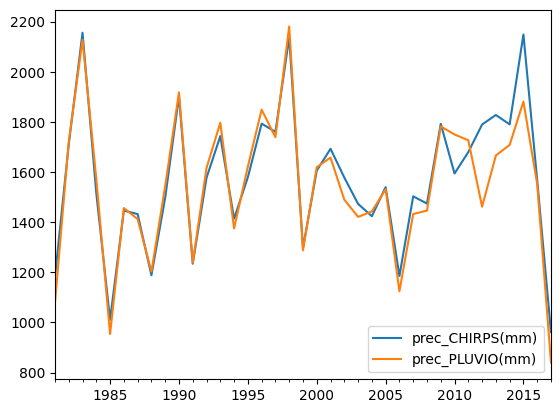

In [32]:
df_anual.plot()

In [33]:
df_mensal = df.resample('m').sum()
df_mensal

,prec_CHIRPS(mm),prec_PLUVIO(mm)
1981-01-31,172.2926,172.5
1981-02-28,129.5142,112.8
1981-03-31,65.2369,57.7
1981-04-30,98.3167,101.5
1981-05-31,41.6007,42.1
...,...,...
2017-02-28,198.0672,158.2
2017-03-31,128.0483,95.3
2017-04-30,101.5694,88.1
2017-05-31,163.7167,141.0


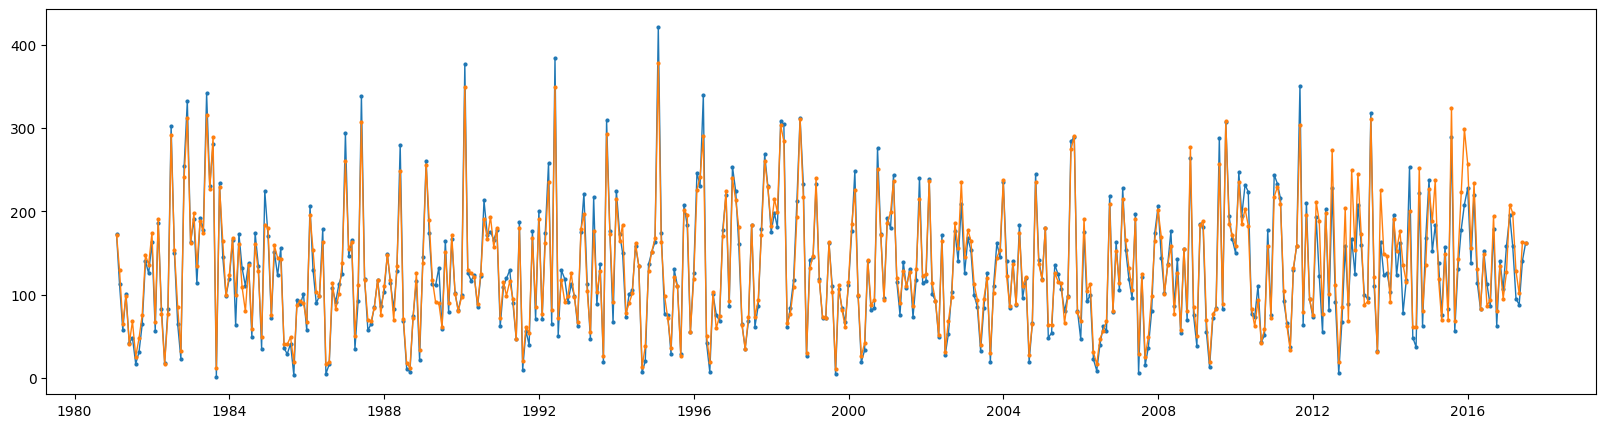

In [38]:
plt.figure(figsize=(20,5))
plt.plot(df_mensal['prec_PLUVIO(mm)'], 'o-',linewidth = 1,markersize = 2, markeredgewidth = 1,label='Pluviômetro')
plt.plot(df_mensal['prec_CHIRPS(mm)'], 'o-',linewidth = 1,markersize = 2, markeredgewidth = 1,label='Base Chirps')

plt.show();